### Libraries 

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from networkx.algorithms import community
import warnings
warnings.filterwarnings('ignore')

## 1. Calculate the correlation matrix

*cor_matrix* contains the full correlation matrix. The table below shows a snapshot of the first 5 rows.

In [66]:
#reads the csv
data = pd.read_csv('/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/sync_9_16/reward/sub-003_reward.txt', header=None, sep = "\t")
data.columns = ["Amygdala_L", "Amygdala_R", "Dorsal_striatum_L", "Dorsal_striatum_R", "Fusiform_gyrus_L", "Fusiform_gyrus_R", "Hippocampus_L", "Hippocampus_R", "Insula_L",
                 "Insula_R", "Intracalcarine_cortex_L", "Intracalcarine_cortex_R", "lOFC_R", "mOFC_L", "mOFC_R", "Oral_somatosensory_cortex_L", "Oral_somatosensory_cortex_R", "Precuneus_L", 
                 "Precuneus_R", "Ventral_striatum_L", "Ventral_striatum_R", "vlPFC_L", "vlPFC_R", "vlThalamus_L" , "vlThalamus_R", "vmPFC_L", "vmPFC_R"]

#creates a correlation matrix 
cor_matrix = data.corr()

In [34]:
#Visualize the correlation matrix as a heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, cmap="RdBu_r", annot=True, annot_kws={"size": 7})

NameError: name 'corr_matrix' is not defined

<Figure size 1152x1152 with 0 Axes>

In [35]:
#Changes from dataframe to matrix, so it is easier to create a graph with networkx
#cor_matrix = np.asmatrix(cor_matrix)
cor_matrix

,Amygdala_L,Amygdala_R,Dorsal_striatum_L,Dorsal_striatum_R,Fusiform_gyrus_L,Fusiform_gyrus_R,Hippocampus_L,Hippocampus_R,Insula_L,Insula_R,...,Precuneus_L,Precuneus_R,Ventral_striatum_L,Ventral_striatum_R,vlPFC_L,vlPFC_R,vlThalamus_L,vlThalamus_R,vmPFC_L,vmPFC_R
Amygdala_L,1.000000,0.707173,-0.076323,-0.070919,0.137706,0.039000,0.646548,0.637845,-0.014036,-0.026191,...,-0.233203,0.040934,0.074201,0.259000,0.298293,0.233106,0.198174,0.352994,0.032821,-0.176568
Amygdala_R,0.707173,1.000000,0.019935,0.099469,0.202192,0.037258,0.466684,0.648390,-0.002904,-0.002836,...,-0.183034,0.190296,0.171387,0.389244,0.218494,0.304000,0.072960,0.129145,0.228253,-0.096300
Dorsal_striatum_L,-0.076323,0.019935,1.000000,0.598630,0.071476,-0.003909,-0.157624,0.010188,-0.030797,0.181569,...,0.515098,-0.100744,0.091540,0.221902,0.362649,0.237835,0.224012,0.284553,0.020128,0.668962
Dorsal_striatum_R,-0.070919,0.099469,0.598630,1.000000,0.238861,0.306265,-0.022695,0.129548,0.001210,0.416804,...,0.367040,0.165811,0.247040,0.491159,0.200108,0.092758,0.164288,0.049755,0.384621,0.481261
Fusiform_gyrus_L,0.137706,0.202192,0.071476,0.238861,1.000000,0.530932,0.390928,0.391908,-0.160073,0.067838,...,-0.066010,0.012056,0.277586,0.156756,-0.023510,0.027649,-0.064014,-0.105687,0.429971,0.009557
Fusiform_gyrus_R,0.039000,0.037258,-0.003909,0.306265,0.530932,1.000000,0.214134,0.247146,-0.092911,0.138146,...,0.051638,0.059444,0.082901,0.234664,-0.089748,0.018452,-0.090170,-0.213767,0.374632,0.062420
Hippocampus_L,0.646548,0.466684,-0.157624,-0.022695,0.390928,0.214134,1.000000,0.596978,-0.002723,-0.281265,...,-0.339485,-0.013222,0.119062,0.355973,0.076419,0.039493,0.127942,0.165981,0.168931,-0.186791
Hippocampus_R,0.637845,0.648390,0.010188,0.129548,0.391908,0.247146,0.596978,1.000000,-0.060197,0.014135,...,-0.293472,0.092714,0.167652,0.519040,0.065837,0.224931,-0.055742,0.078076,0.157711,-0.048295
Insula_L,-0.014036,-0.002904,-0.030797,0.001210,-0.160073,-0.092911,-0.002723,-0.060197,1.000000,0.318867,...,0.234588,0.437776,-0.094305,0.152869,0.271668,0.043381,-0.025541,0.106983,-0.079383,0.085299
Insula_R,-0.026191,-0.002836,0.181569,0.416804,0.067838,0.138146,-0.281265,0.014135,0.318867,1.000000,...,0.409322,0.516746,0.230482,0.302016,0.277533,0.359795,0.113814,0.106120,0.251091,0.131354


In [25]:
#Changes from dataframe to matrix, so it is easier to create a graph with networkx
mat = cor_matrix.to_numpy()
noG = nx.from_numpy_matrix(mat)
noG

In [26]:
# function to threshold correlation matrix 

def create_corr_network(G, corr_direction, min_correlation):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in list(G.edges(data=True)):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0        
        if corr_direction == "positive":
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
    return(H)

## 2. Run with Positive Correlations

Workflow
1. extract positive correlations
2. make graph
3. check mean functional connectivity 
4. calculate graph metrics

In [27]:
#threshold graph to include positive correlaion only
GRAPHS=create_corr_network(noG, "positive", 0)

In [28]:
#check resulting graph
GRAPHS.edges(data=True)

EdgeDataView([(0, 0, {'weight': 1.0}), (0, 1, {'weight': 0.7071732776507336}), (0, 4, {'weight': 0.13770619157708275}), (0, 5, {'weight': 0.03900026858543859}), (0, 6, {'weight': 0.6465481003480796}), (0, 7, {'weight': 0.6378447705945164}), (0, 14, {'weight': 0.22812369408150135}), (0, 15, {'weight': 0.00050741878992263}), (0, 18, {'weight': 0.04093419822587639}), (0, 19, {'weight': 0.07420079108309072}), (0, 20, {'weight': 0.25899988910559674}), (0, 21, {'weight': 0.2982930072389217}), (0, 22, {'weight': 0.2331060434415476}), (0, 23, {'weight': 0.19817408883101043}), (0, 24, {'weight': 0.35299436621822355}), (0, 25, {'weight': 0.0328208632984219}), (1, 1, {'weight': 1.0}), (1, 2, {'weight': 0.019934871809682425}), (1, 3, {'weight': 0.09946879405564558}), (1, 4, {'weight': 0.20219198426968776}), (1, 5, {'weight': 0.037257993189954056}), (1, 6, {'weight': 0.4666844242996033}), (1, 7, {'weight': 0.6483895477292809}), (1, 12, {'weight': 0.019289071606021606}), (1, 14, {'weight': 0.2090710

In [29]:
#Creates a dictionary with node names
mapping={0:"Amygdala_L",1:"Amygdala_R", 2:"Dorsal_striatum_L", 3:"Dorsal_striatum_R", 4:"Fusiform_gyrus_L", 5:"Fusiform_gyrus_R", 6:"Hippocampus_L", 7:"Hippocampus_R", 8:"Insula_L",
         9:"Insula_R", 10:"Intracalcarine_cortex_L", 11:"Intracalcarine_cortex_R", 12:"lOFC_R", 13: "mOFC_L", 14:"mOFC_R", 15:"Oral_somatosensory_cortex_L", 16:"Oral_somatosensory_cortex_R", 17:"Precuneus_L", 
         18:"Precuneus_R", 19:"Ventral_striatum_L", 20:"Ventral_striatum_R", 21:"vlPFC_L", 22:"vlPFC_R", 23:"vlThalamus_L" , 24:"vlThalamus_R", 25: "vmPFC_L", 26: "vmPFC_R"}

#relabels the nodes to match the ROI names
G = nx.relabel_nodes(GRAPHS,mapping)

In [30]:
#function to create and display networks from the correlatin matrix. 
def vis_corr_network_1(G):
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    #positions
    positions=nx.circular_layout(G)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(G,positions,node_color='#DA70D6',
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(G, positions, font_size=8, 
                            font_family='sans-serif')
        
    #draws the edges
    nx.draw_networkx_edges(G, positions, edge_list=edges,style='solid')
    
    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part1.png", format="PNG")
    plt.show() 

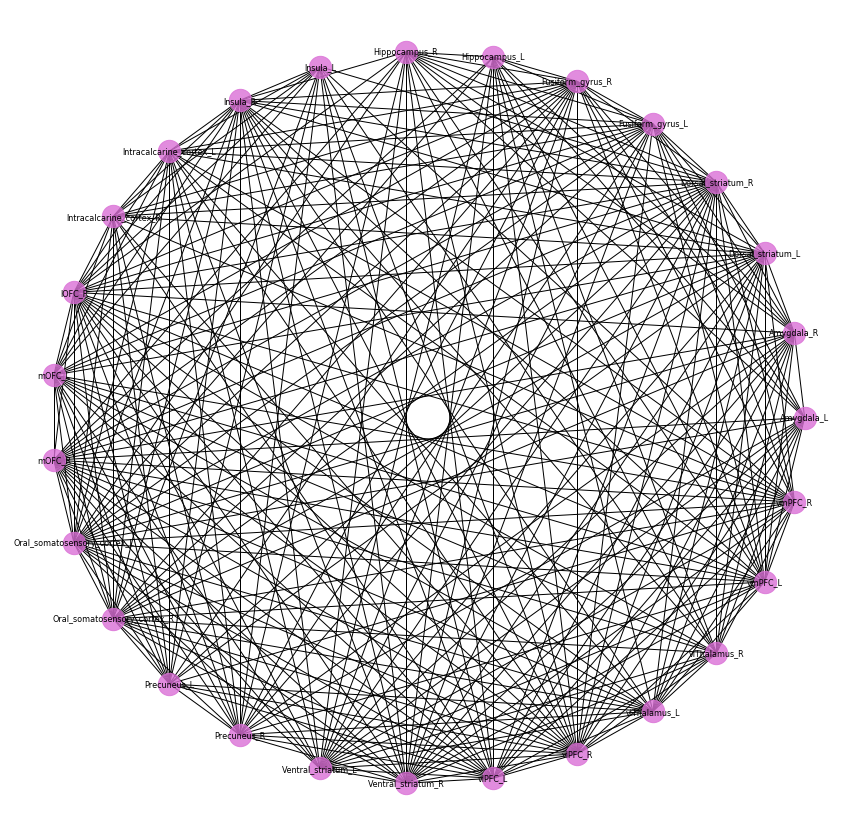

In [31]:
vis_corr_network_1(G)

In [70]:
# check distribution of nodal mean FC for the positive values 
# calculate mean FC (mean correlation strength per node)
#drop negatives
cor_matrix1 = cor_matrix.mask(cor_matrix < 0)

#drop 1's
cor_matrix1 = cor_matrix1.mask(cor_matrix1 > 0.999999)
cor_matrix1

,Amygdala_L,Amygdala_R,Dorsal_striatum_L,Dorsal_striatum_R,Fusiform_gyrus_L,Fusiform_gyrus_R,Hippocampus_L,Hippocampus_R,Insula_L,Insula_R,...,Precuneus_L,Precuneus_R,Ventral_striatum_L,Ventral_striatum_R,vlPFC_L,vlPFC_R,vlThalamus_L,vlThalamus_R,vmPFC_L,vmPFC_R
Amygdala_L,NaN,0.707173,NaN,NaN,0.137706,0.039000,0.646548,0.637845,NaN,NaN,...,NaN,0.040934,0.074201,0.259000,0.298293,0.233106,0.198174,0.352994,0.032821,NaN
Amygdala_R,0.707173,NaN,0.019935,0.099469,0.202192,0.037258,0.466684,0.648390,NaN,NaN,...,NaN,0.190296,0.171387,0.389244,0.218494,0.304000,0.072960,0.129145,0.228253,NaN
Dorsal_striatum_L,NaN,0.019935,NaN,0.598630,0.071476,NaN,NaN,0.010188,NaN,0.181569,...,0.515098,NaN,0.091540,0.221902,0.362649,0.237835,0.224012,0.284553,0.020128,0.668962
Dorsal_striatum_R,NaN,0.099469,0.598630,NaN,0.238861,0.306265,NaN,0.129548,0.001210,0.416804,...,0.367040,0.165811,0.247040,0.491159,0.200108,0.092758,0.164288,0.049755,0.384621,0.481261
Fusiform_gyrus_L,0.137706,0.202192,0.071476,0.238861,NaN,0.530932,0.390928,0.391908,NaN,0.067838,...,NaN,0.012056,0.277586,0.156756,NaN,0.027649,NaN,NaN,0.429971,0.009557
Fusiform_gyrus_R,0.039000,0.037258,NaN,0.306265,0.530932,NaN,0.214134,0.247146,NaN,0.138146,...,0.051638,0.059444,0.082901,0.234664,NaN,0.018452,NaN,NaN,0.374632,0.062420
Hippocampus_L,0.646548,0.466684,NaN,NaN,0.390928,0.214134,NaN,0.596978,NaN,NaN,...,NaN,NaN,0.119062,0.355973,0.076419,0.039493,0.127942,0.165981,0.168931,NaN
Hippocampus_R,0.637845,0.648390,0.010188,0.129548,0.391908,0.247146,0.596978,NaN,NaN,0.014135,...,NaN,0.092714,0.167652,0.519040,0.065837,0.224931,NaN,0.078076,0.157711,NaN
Insula_L,NaN,NaN,NaN,0.001210,NaN,NaN,NaN,NaN,NaN,0.318867,...,0.234588,0.437776,NaN,0.152869,0.271668,0.043381,NaN,0.106983,NaN,0.085299
Insula_R,NaN,NaN,0.181569,0.416804,0.067838,0.138146,NaN,0.014135,0.318867,NaN,...,0.409322,0.516746,0.230482,0.302016,0.277533,0.359795,0.113814,0.106120,0.251091,0.131354


In [71]:
#x=abs(cor_matrix)
mu=cor_matrix1.mean()
mu

Amygdala_L                     0.259095
Amygdala_R                     0.219425
Dorsal_striatum_L              0.280370
Dorsal_striatum_R              0.279082
Fusiform_gyrus_L               0.198879
Fusiform_gyrus_R               0.184499
Hippocampus_L                  0.273421
Hippocampus_R                  0.240693
Insula_L                       0.212939
Insula_R                       0.276323
Intracalcarine_cortex_L        0.249647
Intracalcarine_cortex_R        0.327014
lOFC_R                         0.294398
mOFC_L                         0.279031
mOFC_R                         0.241125
Oral_somatosensory_cortex_L    0.193728
Oral_somatosensory_cortex_R    0.312137
Precuneus_L                    0.370958
Precuneus_R                    0.236585
Ventral_striatum_L             0.173925
Ventral_striatum_R             0.249515
vlPFC_L                        0.243321
vlPFC_R                        0.199358
vlThalamus_L                   0.163996
vlThalamus_R                   0.185048


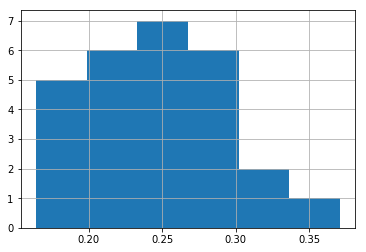

In [72]:
#Visualize the distribution of mean FC
hist = mu.hist(bins=6)

The mean FC distribution looks normal -- no errant high or low values. No need to threshold. 

## 2. Run with Negative Correlations

Workflow
1. extract negative correlations
2. make graph
3. check mean functional connectivity 
4. calculate graph metrics

In [10]:
GRAPHS=create_corr_network_5(noG, "negative", 0)

In [11]:
GRAPHS.edges(data=True)

EdgeDataView([(0, 2, {'weight': -0.0763229095471842}), (0, 3, {'weight': -0.07091855561681537}), (0, 8, {'weight': -0.01403566421564113}), (0, 9, {'weight': -0.026191404202700008}), (0, 10, {'weight': -0.38071440803464646}), (0, 11, {'weight': -0.19930839928408597}), (0, 12, {'weight': -0.04883583684337579}), (0, 13, {'weight': -0.0649396362889408}), (0, 16, {'weight': -0.02492099322507881}), (0, 17, {'weight': -0.23320303421389288}), (0, 26, {'weight': -0.17656756993955955}), (1, 8, {'weight': -0.002904428111600684}), (1, 9, {'weight': -0.0028362593434977214}), (1, 10, {'weight': -0.2509666690375563}), (1, 11, {'weight': -0.08353230508236247}), (1, 13, {'weight': -0.24142848814351256}), (1, 17, {'weight': -0.18303407079844927}), (1, 26, {'weight': -0.096300264842129}), (2, 5, {'weight': -0.003908985375590329}), (2, 6, {'weight': -0.15762394411283742}), (2, 8, {'weight': -0.030797064943496155}), (2, 18, {'weight': -0.10074405247144903}), (3, 6, {'weight': -0.02269524237357057}), (4, 8,

## 1b. Create the graph

In [13]:
#Creates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)

#Shows the edges with their corresponding edges
noG.edges(data=True)

EdgeDataView([(0, 0, {'weight': 1.0}), (0, 1, {'weight': 0.7071732776507336}), (0, 2, {'weight': -0.0763229095471842}), (0, 3, {'weight': -0.07091855561681537}), (0, 4, {'weight': 0.13770619157708275}), (0, 5, {'weight': 0.03900026858543859}), (0, 6, {'weight': 0.6465481003480796}), (0, 7, {'weight': 0.6378447705945164}), (0, 8, {'weight': -0.01403566421564113}), (0, 9, {'weight': -0.026191404202700008}), (0, 10, {'weight': -0.38071440803464646}), (0, 11, {'weight': -0.19930839928408597}), (0, 12, {'weight': -0.04883583684337579}), (0, 13, {'weight': -0.0649396362889408}), (0, 14, {'weight': 0.22812369408150135}), (0, 15, {'weight': 0.00050741878992263}), (0, 16, {'weight': -0.02492099322507881}), (0, 17, {'weight': -0.23320303421389288}), (0, 18, {'weight': 0.04093419822587639}), (0, 19, {'weight': 0.07420079108309072}), (0, 20, {'weight': 0.25899988910559674}), (0, 21, {'weight': 0.2982930072389217}), (0, 22, {'weight': 0.2331060434415476}), (0, 23, {'weight': 0.19817408883101043}), 

In [14]:
#Creates a dictionary with node names
mapping={0:"Amygdala_L",1:"Amygdala_R", 2:"Dorsal_striatum_L", 3:"Dorsal_striatum_R", 4:"Fusiform_gyrus_L", 5:"Fusiform_gyrus_R", 6:"Hippocampus_L", 7:"Hippocampus_R", 8:"Insula_L",
         9:"Insula_R", 10:"Intracalcarine_cortex_L", 11:"Intracalcarine_cortex_R", 12:"lOFC_R", 13: "mOFC_L", 14:"mOFC_R", 15:"Oral_somatosensory_cortex_L", 16:"Oral_somatosensory_cortex_R", 17:"Precuneus_L", 
         18:"Precuneus_R", 19:"Ventral_striatum_L", 20:"Ventral_striatum_R", 21:"vlPFC_L", 22:"vlPFC_R", 23:"vlThalamus_L" , 24:"vlThalamus_R", 25: "vmPFC_L", 26: "vmPFC_R"}

#relabels the nodes to match the ROI names
G = nx.relabel_nodes(GRAPHS,mapping)

## Part 1a: Compute Network Metrics from graph 

In [15]:
#Summarizes the Graph
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 27\nNumber of edges: 80\nAverage degree:   5.9259'

## Part 1: The basic graph

In [7]:
#function to create and display networks from the correlatin matrix. 

def vis_corr_network_1(G):
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    #positions
    positions=nx.circular_layout(G)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(G,positions,node_color='#DA70D6',
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(G, positions, font_size=8, 
                            font_family='sans-serif')
        
    #draws the edges
    nx.draw_networkx_edges(G, positions, edge_list=edges,style='solid')
    
    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part1.png", format="PNG")
    plt.show() 



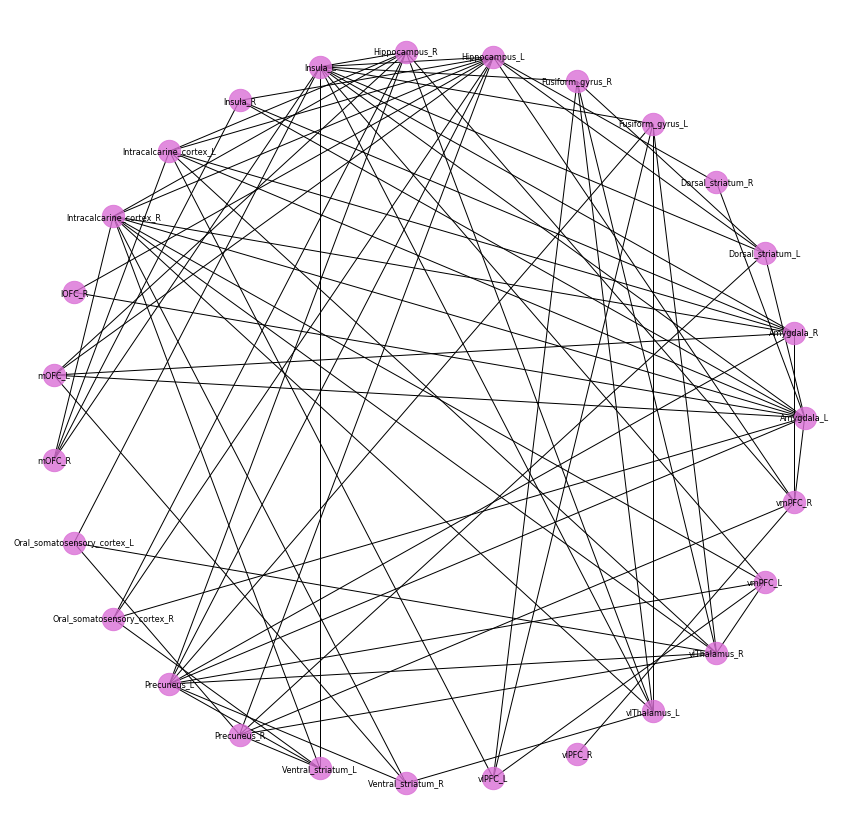

In [72]:
vis_corr_network_1(G)

## Part 2: Separating between negative and positive correlations

In [44]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network_2(G, corr_direction):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in G.edges_iter(data=True):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0
        if corr_direction == "positive":
            if weight["weight"] <0:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            if weight["weight"] >=0:
                H.remove_edge(stock1, stock2)
                
    
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())

    #positions
    positions=nx.circular_layout(H)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
        
    #draws the edges
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid')
    
    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part2" + corr_direction + ".png", format="PNG")
    plt.show() 


In [45]:
create_corr_network_2(G,corr_direction="positive")

AttributeError: 'Graph' object has no attribute 'edges_iter'

In [46]:
create_corr_network_2(G,corr_direction="negative")

AttributeError: 'Graph' object has no attribute 'edges_iter'

In [40]:
#Grace's original function
def make_graphs(list_o_data, direction, min_cor):
    edge_dict={}
    cor_dict={}
    FC_dict={}
    graph_dict={}
    for key, val_list in list_o_data.items():
        for i in val_list:
            i=i.set_index(labels.ID)
            i.rename(columns=labels.ID, inplace=True)
            ########################################
            edge_dict.setdefault(key, []).append(i)
            ########################################
            cor_matrix = np.asmatrix(i)
            x=abs(cor_matrix)
            mu=x.mean()
            ########################################
            cor_dict.setdefault(key, []).append(x)
            ########################################
            FC_dict.setdefault(key, []).append(mu)
            ########################################
            G = nx.from_numpy_matrix(cor_matrix)
            for i, nlrow in labels.iterrows():
                G.node[i].update(nlrow[0:].to_dict())
            ########################################
            graph_dict.setdefault(key, []).append(G)
            ########################################
            partition = community.best_partition(create_corr_network_5(G, direction,min_cor))
            ########################################
            graph_dict.setdefault(key, []).append(partition)
            ########################################
    return({'edges':edge_dict, 'correlations':cor_dict, 'mean_FC':FC_dict, 'graphs':graph_dict})

## Part 3: Styling the edges based on their weights

In [47]:
create_corr_network_3(G, corr_direction="positive")

AttributeError: 'Graph' object has no attribute 'edges_iter'

In [48]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network_3(G, corr_direction):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in G.edges_iter(data=True):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0
        if corr_direction == "positive":
            if weight["weight"] <0:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            if weight["weight"] >=0:
                H.remove_edge(stock1, stock2)
                
    
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    ### increases the value of weights, so that they are more visible in the graph
    weights = tuple([(1+abs(x))**2 for x in weights])

    #positions
    positions=nx.circular_layout(H)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6', 
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    ###edge colors based on weight direction
    if corr_direction == "positive":
        edge_colour = plt.cm.GnBu 
    else:
        edge_colour = plt.cm.PuRd
        
    #draws the edges
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          ###adds width=weights and edge_color = weights 
                          ###so that edges are based on the weight parameter 
                          ###edge_cmap is for the color scale based on the weight
                          ### edge_vmin and edge_vmax assign the min and max weights for the width
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))

    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part3" + corr_direction + ".png", format="PNG")
    plt.show() 


In [49]:
create_corr_network_3(G, corr_direction="negative")

AttributeError: 'Graph' object has no attribute 'edges_iter'

In [19]:
#from networkx.algorithms import community

c = list(greedy_modularity_communities(G))
c


NameError: name 'greedy_modularity_communities' is not defined

## Part 4: Filtering edges with a minimum correlation

In [50]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network_4(G, corr_direction, min_correlation):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in G.edges_iter(data=True):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0        
        if corr_direction == "positive":
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    ### increases the value of weights, so that they are more visible in the graph
    weights = tuple([(1+abs(x))**2 for x in weights])

    #positions
    positions=nx.circular_layout(H)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    ###edge colors based on weight direction
    if corr_direction == "positive":
        edge_colour = plt.cm.GnBu 
    else:
        edge_colour = plt.cm.PuRd
        
    #draws the edges
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          ###adds width=weights and edge_color = weights 
                          ###so that edges are based on the weight parameter 
                          ##edge_cmap is for the color scale based on the weight
                          ### edge_vmin and edge_vmax assign the min and max weights for the width
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))

    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part4" + corr_direction + ".png", format="PNG")
    plt.show() 


In [51]:
create_corr_network_4(G, corr_direction="positive", min_correlation = 0.7)

AttributeError: 'Graph' object has no attribute 'edges_iter'

In [52]:
create_corr_network_4(G, corr_direction="negative", min_correlation = -0.7)

AttributeError: 'Graph' object has no attribute 'edges_iter'

## Part 5: Styling the nodes based on the number of edges linked (degree)

In [53]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network_5(G, corr_direction, min_correlation):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in G.edges_iter(data=True):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0        
        if corr_direction == "positive":
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    ### increases the value of weights, so that they are more visible in the graph
    weights = tuple([(1+abs(x))**2 for x in weights])
    
    #####calculates the degree of each node
    d = nx.degree(H)
    #####creates list of nodes and a list their degrees that will be used later for their sizes
    nodelist, node_sizes = zip(*d.items())

    #positions
    positions=nx.circular_layout(H)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,
                           #####the node size will be now based on its degree
                           node_size=tuple([x**3 for x in node_sizes]),alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    ###edge colors based on weight direction
    if corr_direction == "positive":
        edge_colour = plt.cm.GnBu 
    else:
        edge_colour = plt.cm.PuRd
        
    #draws the edges
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          ###adds width=weights and edge_color = weights 
                          ###so that edges are based on the weight parameter 
                          ###edge_cmap is for the color scale based on the weight
                          ### edge_vmin and edge_vmax assign the min and max weights for the width
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))

    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part5" + corr_direction + ".png", format="PNG")
    plt.show() 


In [54]:
create_corr_network_5(G, corr_direction="positive",min_correlation=0.7)

AttributeError: 'Graph' object has no attribute 'edges_iter'

In [25]:
create_corr_network_5(G, corr_direction="negative",min_correlation=-0.7)

AttributeError: 'Graph' object has no attribute 'edges_iter'